In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from random import seed, randint
import numpy as np

In [ ]:
# reading dataset
(X_tr, y_tr), (X_ts, y_ts) = mnist.load_data()

# shapes of data structures
print('tamaños conjunto de entrenamiento X:', X_tr.shape, '  Y:', y_tr.shape)
print('tamaños conjunto de validación X:', X_ts.shape, '  Y:', y_ts.shape )

tamaños conjunto de entrenamiento X: (60000, 28, 28)   Y: (60000,)
tamaños conjunto de validación X: (10000, 28, 28)   Y: (10000,)


In [ ]:
# image domain
print(np.min(X_tr), np.max(X_tr))
print(np.min(y_tr), np.max(y_tr))

0 255
0 9


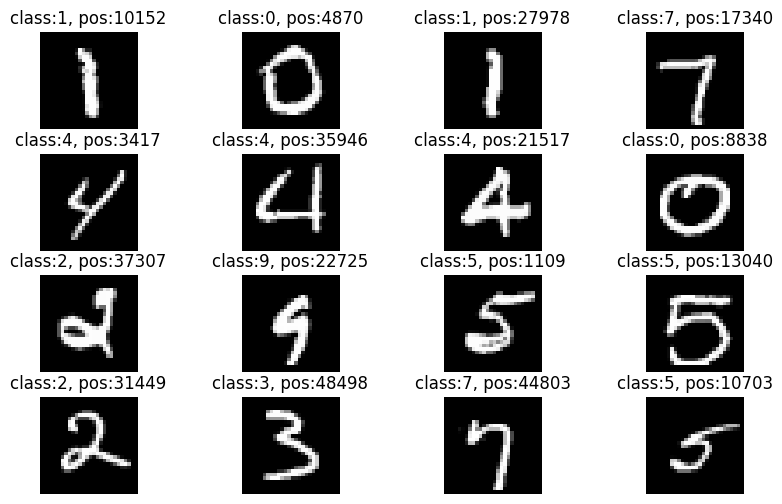

In [ ]:
# viewing randomly chosen images

plt.figure(1, figsize=(10,6))
plt.subplots_adjust(hspace=0.25) #, wspace=3)
for i in range(16):
    plt.subplot(4, 4, i+1)
    # plt.tight_layout()
    j = randint(0, y_tr.shape[0]-1)
    plt.imshow(X_tr[j], cmap='gray', interpolation='none')
    plt.title('class:{}, pos:{}'.format(y_tr[j], j))
    plt.axis("off")
plt.show()

In [ ]:
# preprocessing data

num_classes=10

# images are flattened (28x28=784)
X_tr = X_tr.reshape(60000, 784).astype('float64')
X_ts = X_ts.reshape(10000, 784).astype('float64')

# image normalization from [0..255] to [0..1]
X_tr /= 255
X_ts /= 255

# re-labeling images with one-hot vectors [0,0,1,0,...]
y_tr_original = y_tr
y_ts_original = y_ts
y_tr = keras.utils.to_categorical(y_tr, num_classes)
y_ts = keras.utils.to_categorical(y_ts, num_classes)

# example of correspondence between original label and its one-hot vector
id_sample = randint(0, y_tr.shape[0]-1)
print('sample: {}, class: {}'.format(id_sample, y_tr_original[id_sample]))
print('sample: {}, hot vector: '.format(id_sample), y_tr[id_sample], '\n')

# new shapes of data structures
print('tamaños conjunto de entrenamiento X:', X_tr.shape, '  Y:', y_tr.shape)
print('tamaños conjunto de validación X:', X_ts.shape, '  Y:', y_ts.shape )

sample: 25192, class: 5
sample: 25192, hot vector:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 

tamaños conjunto de entrenamiento X: (60000, 784)   Y: (60000, 10)
tamaños conjunto de validación X: (10000, 784)   Y: (10000, 10)


In [ ]:
# classification model: input layer + 3 hidden layers + output layers

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 59210 (231.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
import time
import math

X_tr, X_va, y_tr, y_va = train_test_split(X_tr, y_tr, test_size=0.5, random_state=1, stratify=y_tr)

# hyperparameters
batch_size = 100
epochs = 20
opt=SGD(learning_rate=0.01, momentum=0.9)

# model setting
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model training
best_model_file = 'best_fcn_digits'
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = best_model_file,
    save_weights_only = True,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    save_freq='epoch'
)

start_time = time.time()
history = model.fit(X_tr, y_tr, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_va, y_va), callbacks=[model_checkpoint])
print('Tiempo: {0:.2f} min'.format((time.time()-start_time)/60))

Epoch 1/20
300/300 [==============================] - 3s 7ms/step - loss: 0.7242 - accuracy: 0.7724 - val_loss: 0.3568 - val_accuracy: 0.8919
Epoch 2/20
300/300 [==============================] - 2s 6ms/step - loss: 0.2658 - accuracy: 0.9204 - val_loss: 0.2367 - val_accuracy: 0.9291
Epoch 3/20
300/300 [==============================] - 2s 5ms/step - loss: 0.1926 - accuracy: 0.9428 - val_loss: 0.1962 - val_accuracy: 0.9404
Epoch 4/20
300/300 [==============================] - 2s 6ms/step - loss: 0.1548 - accuracy: 0.9520 - val_loss: 0.1738 - val_accuracy: 0.9491
Epoch 5/20
300/300 [==============================] - 2s 6ms/step - loss: 0.1309 - accuracy: 0.9599 - val_loss: 0.1559 - val_accuracy: 0.9535
Epoch 6/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1125 - accuracy: 0.9666 - val_loss: 0.1650 - val_accuracy: 0.9520
Epoch 7/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0952 - accuracy: 0.9717 - val_loss: 0.1439 - val_accuracy: 0.9582
Epoch 

In [ ]:
# recovering the best model
model.load_weights(best_model_file)

train_results = model.evaluate(X_tr, y_tr, verbose=0)
print('Loss on training data: {:.4f}'.format(train_results[0]))
print('Accuracy on training data: {:.4f}\n'.format(train_results[1]))

test_results = model.evaluate(X_ts, y_ts, verbose=0)
print('Loss on test data: {0:.4f}'.format(test_results[0]))
print('Accuracy on test data: {0:.4f}\n'.format(test_results[1]))


Loss on training data: 0.0374
Accuracy on training data: 0.9898

Loss on test data: 0.1106
Accuracy on test data: 0.9673



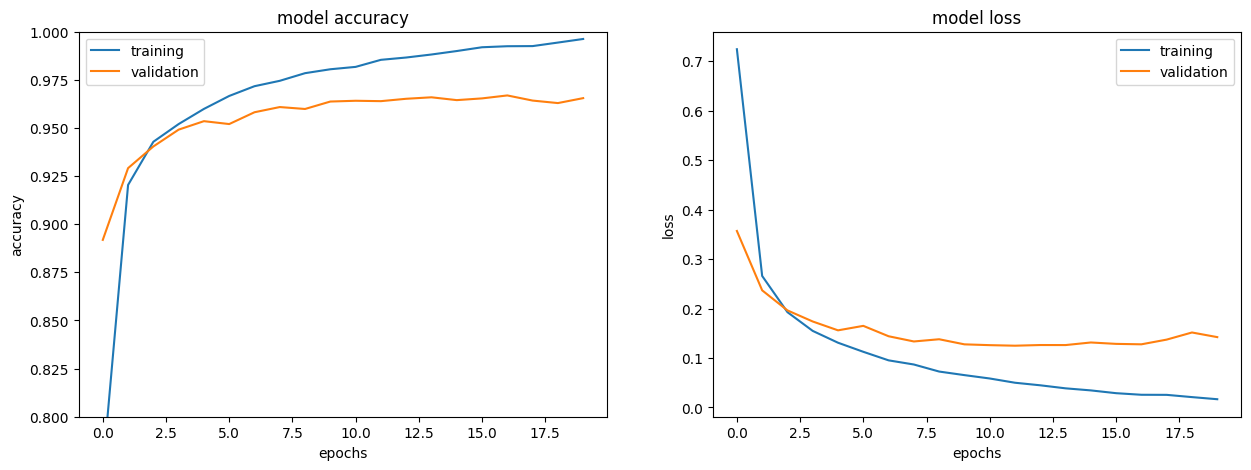

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='training')
ax[0].plot(history.history['val_accuracy'], label='validation')
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylim(0.8, 1)
ax[0].legend()
plt.legend(['train', 'test'], loc='upper left')
ax[1].plot(history.history['loss'], label='training')
ax[1].plot(history.history['val_loss'], label='validation')
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epochs')
ax[1].legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# confusion matrix of test data
test_probabilities = model.predict(X_ts)
print(test_probabilities.shape)

test_predictions = np.argmax(test_probabilities, axis=1)
print(test_predictions.shape)

print('\nClass sizes:\n', [np.sum(y_ts_original==i) for i in range(10)])
print('\nConfusion matrix:\n', confusion_matrix(y_ts_original, test_predictions))

313/313 [==============================] - 1s 2ms/step
(10000, 10)
(10000,)

Class sizes:
 [980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

Confusion matrix:
 [[ 964    0    0    3    0    5    3    1    0    4]
 [   0 1121    2    1    0    1    4    2    4    0]
 [   4    1  995   11    2    3    3    6    7    0]
 [   0    0    9  984    0    5    0    6    4    2]
 [   1    0    3    0  950    0    6    2    1   19]
 [   3    1    0   13    1  860    7    1    3    3]
 [   3    2    0    0   10   11  931    0    1    0]
 [   1    7   18    2    0    0    1  980    4   15]
 [   4    1    5   12    2   13    5    5  923    4]
 [   3    5    0    7    9    5    0    4   11  965]]


In [ ]:
# looking into classifier errors

target_label = 0
pred_label = 6
target_indexes = np.asarray(y_ts_original==target_label).nonzero()
print(np.asarray(target_indexes).shape)
prediction_indexes = np.asarray(test_predictions==pred_label).nonzero()
print(np.asarray(prediction_indexes).shape)
errors = np.intersect1d(target_indexes, prediction_indexes)
print(errors.size, errors)

(1, 980)
(1, 960)
3 [1121 1621 4477]


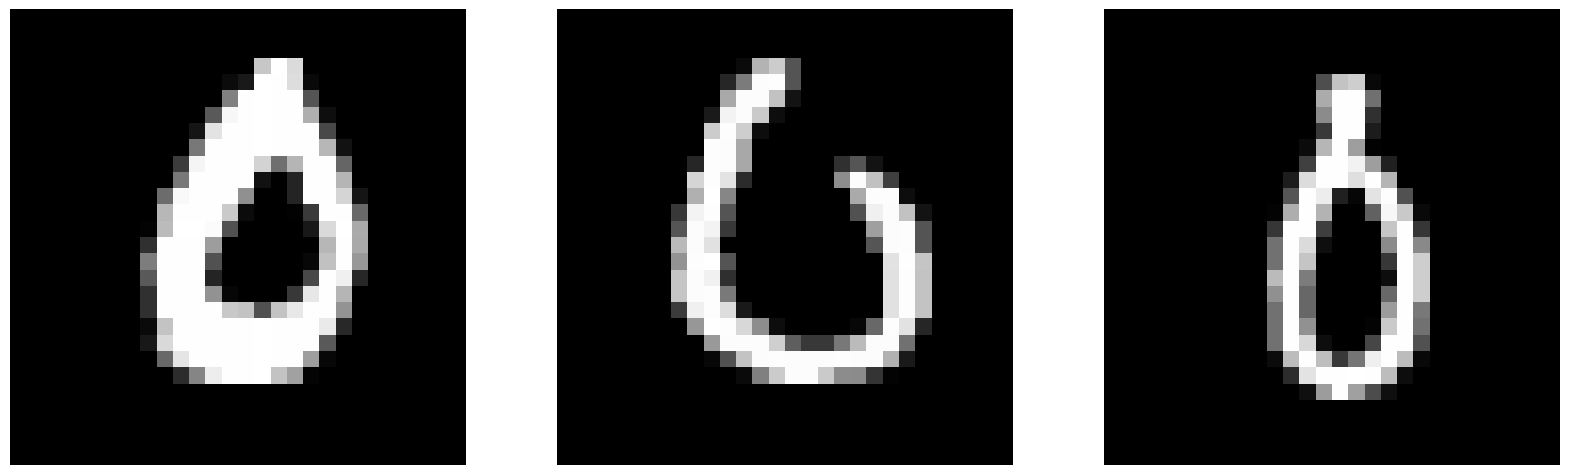

In [ ]:
# displaying a number of model errors

plt.figure(2, figsize=(20,6))
plt.subplots_adjust(hspace=0.25) #, wspace=3)
n = min(errors.size,10)
for i in range(n):
    plt.subplot(1, n, i+1)
    j = errors[i]
    plt.imshow(X_ts[j].reshape((28,28)), cmap='gray', interpolation='none')
    plt.axis("off")
plt.show()